## Feature selection

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import funct
import importlib
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


importlib.reload(funct)

x_train = pd.read_csv('variables/x_train.csv')
y_train = pd.read_csv('variables/y_train.csv')

y= y_train.iloc[:,5]
x = x_train.iloc[:,:2]


(31, 4)
Index(['Gender-0=M, 1 =F', 'Age', 'Bone mean', '125_250BA'], dtype='object')
(31, 4)


32

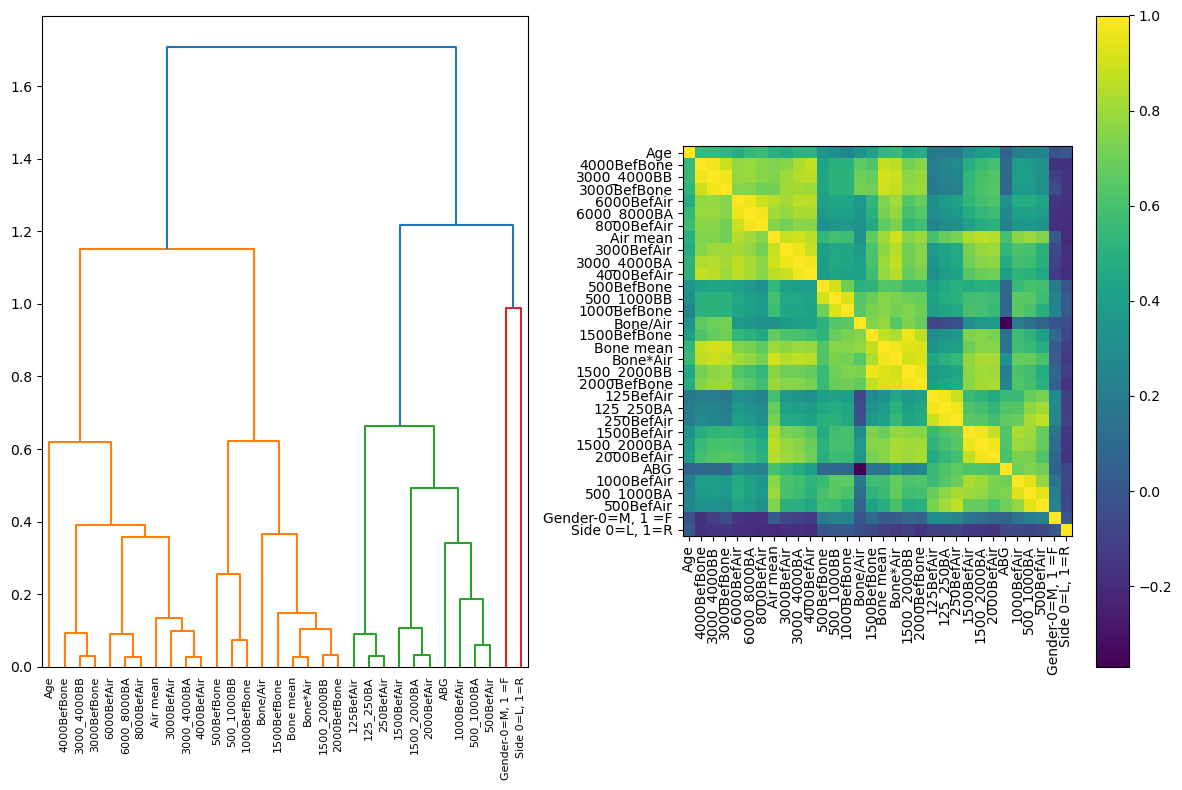

In [2]:
#print(correlation_select(x_train))
selected_features_names = funct.correlation_select(x_train)
print(selected_features_names)

len(funct.correlation_distance(x_train))

In [3]:
filtered_features = []
for i in range(16):
    y = y_train.iloc[:,i]
    print("COL NAME: " + y.name)   

    outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

    lasso_model_opt = LassoCV(cv=10, random_state=1).fit(x_train, y)

    # select features where lasso coefficients > 0
    x_cols= x_train.columns[np.abs(lasso_model_opt.coef_) > 0]
    print(x_cols)
    print(lasso_model_opt.coef_)

    x_train_sel = x_train[x_cols]
    close_features = funct.correlation_distance(x_train_sel)
    filtered_cols = funct.distance_filter(x_train.columns, x_cols, lasso_model_opt.coef_, close_features)

    filtered_features.append(filtered_cols)


path = 'variables/class_columns'


COL NAME: 125AftAir
Index(['125_250BA', '1500_2000BA', '125BefAir', '500BefAir', '1500BefAir',
       '6000BefAir', '1000BefBone'],
      dtype='object')
[ 0.         -0.          0.          0.          0.          0.
  0.          2.13859301  0.         -5.14081036  0.          0.
  0.         -0.          0.         -0.          5.37120208  0.
  0.64191307  0.         -0.3000831  -0.          0.         -0.
  1.17401186  0.          0.          3.06540885 -0.         -0.
  0.          0.        ]
(6, 4)
125_250BA
2.1385930118340637
125BefAir
5.3712020805233776
1500_2000BA
-5.1408103591328995
1500BefAir
-0.3000830969084334
COL NAME: 250AftAir
Index(['1500_2000BA', '6000_8000BA', '250BefAir', '500BefAir', '2000BefAir',
       '8000BefAir', '1000BefBone'],
      dtype='object')
[ 0.         -0.          0.          0.          0.          0.
  0.          0.          0.         -0.98681997  0.          0.05646163
  0.         -0.          0.         -0.          0.          4.37196715


In [4]:
funct.save_pickle(filtered_features,path,True)